# นาย กิตติธรรม ผดุงเวียง 61070277

# Assignment 1

## Task 1. Identify suitable web APIs
API ที่เลือกมานั้นได้มาจากเว็บ https://rawg.io/ โดยให้เลือกไปที่หมวดของ API หรือกดเข้าที่ลิ้งhttps://rawg.io/apidocs
จากนั้นตัวลิ้งจะพาเราไปดูข้อกำหนดวิธีใช้ต่างๆ โดยจำกัดการดึงข้อมูลทั้งหมดถูกจำกัดอยู่ที่ 200 sample ต่อการดึงAPIหนึ่งครั้ง
ใช้ method "GET"+"https://api.rawg.io/api/games?page" +(เลข1ถึง25) จำนวนเลข 1 ถึง 25 คือเลขของหน้าเพจของเว็บไซต์ที่ต้องใช้ถึง 25 หน้า เพราะจาก 200 sample ที่ดึงในแต่ละครั้งนั้นมีชื่อของเกมจริงอยู่แค่ 20 รายการต่อการดึง 1 ครั้ง ทำให้ต้องทำการดึง 25 รอบด้วยวิธีการลูปเพื่อเก็บข้อมูลที่ดึงมาแต่ละครั้ง

## Task 2. Collect data from API
ใช้ method "GET"+"https://api.rawg.io/api/games?page" +(เลข1ถึง25) จำนวนเลข 1 ถึง 25 คือเลขของหน้าเพจของเว็บไซต์ที่ต้องใช้ถึง 25 หน้า เพราะจาก 200 sample ที่ดึงในแต่ละครั้งนั้นมีชื่อของเกมจริงอยู่แค่ 20 รายการต่อการดึง 1 ครั้ง ทำให้ต้องทำการดึง 25 รอบโดยในแต่ละรอบก็จะเก็บข้อมูลที่ดึงมาแต่ละครั้งเข้าไปในไฟล์ csv

In [1]:
#แพคเกจต่างๆที่ใช้งาน
import requests 
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import datetime
import pandas as pd
import json
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### การดึง API และเก็บรวบรวมข้อมูลด้วย function add_data2csv ที่สร้างขึ้น

In [2]:
def add_data2csv(file): #สร้างฟังก์ชันสำหรับการดึงข้อมูล file คือชื่อไฟล์ที่ตั้งให้เก็บข้อมูลดิบ
    for i in range(25): #สร้างลูปดึงข้อมูล 25 รอบ
        page=i+1
        url ='https://api.rawg.io/api/games?page='+str(page) #ลิ้ง api ที่ใช้ 
        response = requests.get(url)
        restext=response.text
        js = pd.io.json.loads(restext)
        with open(file, "a", newline="") as write_file: #เพิ่มข้อมูลลงในไฟล์
            f = csv.writer(write_file)
            for i in js['results']: #เข้าloopเพื่อเพิ่มข้อมูล
                f.writerow((i['name'],i['released'],i['rating']))
            write_file.close()

## Task 3. Parse the collected data, and store it in an appropriate file format for subsequent analysis
#### ทำการส่งออกข้อมูลดิบในรูปของไฟล์ csv

In [3]:
headers = ('name','released','rating') #สร้างหัวตาราง
file = "data/rawdata.csv" #ตำแหน่งและชื่อไฟล์ csv ที่บันทึก
with open(file, "w", newline="") as write_file: #ทำการเขียนไฟล์ข้อมูล
    f = csv.writer(write_file)
    f.writerow(headers)
write_file.close()
add_data2csv(file)

## Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

### ทำการอ่านข้อมูลดิบจากไฟล์ csv ที่เซฟจาก task ที่แล้ว

In [4]:
cleandata=pd.read_csv("data/rawdata.csv",encoding='cp1252') #อ่านไฟล์ Rawdata.csv จากโฟลเดอร์ data
cleandata['Year'] = cleandata.released.str[0:4] #สร้างคอลลัมน์ Year ขึ้นเพื่อการจำแนกเกมตามปีได้ง่ายขึ้น
cleandata.loc[cleandata['rating'] >= 4, 'Degree'] = 'Recommend Game' #เพิ่มข้อมูล Recommend Game ให้ข้อมูลที่มี rating 4 ขึ้นไป
cleandata.loc[cleandata['rating'] < 4 , 'Degree'] = 'General Game'#เพิ่มข้อมูล Genaral Game ให้ข้อมูลที่มี rating ต่ำกว่า 4
cleandata

,name,released,rating,Year,Degree
0,Grand Theft Auto V,2013-09-17,4.48,2013,Recommend Game
1,Portal 2,2011-04-18,4.62,2011,Recommend Game
2,The Witcher 3: Wild Hunt,2015-05-18,4.68,2015,Recommend Game
3,Tomb Raider (2013),2013-03-05,4.06,2013,Recommend Game
4,The Elder Scrolls V: Skyrim,2011-11-11,4.42,2011,Recommend Game
5,Left 4 Dead 2,2009-11-17,4.10,2009,Recommend Game
6,Borderlands 2,2012-09-18,4.05,2012,Recommend Game
7,BioShock Infinite,2013-03-26,4.39,2013,Recommend Game
8,Portal,2007-10-09,4.52,2007,Recommend Game
9,Life is Strange,2015-01-29,4.10,2015,Recommend Game


#### ตรวจสอบชนิดข้อมูล
name คือ ชื่อของเกม,
rating คือ ค่าคะแนนของเกม เต็ม 5 คะแนน,
released คือ ปี-เดือน-วัน ที่ตัวเกมออกวางจำหน่าย,
Year คือ ปีที่เกมออกจำหน่าย

In [5]:
cleandata.dtypes #ตรวจสอบดูชนิดข้อมูลในแต่ละคอลลัมน์

name         object
released     object
rating      float64
Year         object
Degree       object
dtype: object

#### แก้ไขชนิดข้อมูลเพื่อให้ง่ายต่อการนำไปใช้งาน

In [6]:
cleandata.released = pd. to_datetime(cleandata.released)#ทำการเปลี่ยนวันวางจำหน่ายจาก object ให้เป็น datetime
cleandata.Year = pd. to_numeric(cleandata.Year)#ทำการเปลี่ยนปีที่วางจำหน่ายจาก object ให้เป็น numeric(ตัวเลข)
cleandata.dtypes #ตรวจสอบดูชนิดข้อมูลในแต่ละคอลลัมน์หลังจากแก้ไขข้อมูลแล้ว

name                object
released    datetime64[ns]
rating             float64
Year                 int64
Degree              object
dtype: object

In [7]:
cleandata.set_index('released', inplace=True) #กำหนดให้วันเดือนปีที่เกมออกวางจำหน่ายเป็น index เพื่อให้ง่ายต่อการนำข้อมูลไปใช้งาน หรือ plot กราฟ

In [8]:
cleandata=cleandata.sort_index() #ใช้วันออกวางจำหน่ายในการเรียงลำดับจากอดีตถึงปัจจุบัน
cleandata

,name,rating,Year,Degree
released,,,,
1993-12-30,X-COM: UFO Defense,3.69,1993,General Game
1996-03-22,Resident Evil,4.24,1996,Recommend Game
1997-01-31,Final Fantasy VII,4.45,1997,Recommend Game
1997-05-12,Shadow Warrior Classic,3.42,1997,General Game
1997-08-31,Oddworld: Abe's Oddysee,3.47,1997,General Game
1997-09-30,Fallout: A Post Nuclear Role Playing Game,4.24,1997,Recommend Game
1998-01-21,Resident Evil 2 (1998),4.33,1998,Recommend Game
1998-09-30,Fallout 2: A Post Nuclear Role Playing Game,4.35,1998,Recommend Game
1998-11-19,Half-Life,4.37,1998,Recommend Game


#### ตรวจสอบว่ามีค่า Null หรือไม่

In [9]:
cleandata.isnull().sum() #ตรวจสอบค่า Null

name      0
rating    0
Year      0
Degree    0
dtype: int64

จากการตรวจสอบไม่พบค่า Null ใน dataframe

#### ส่งออกข้อมูล dataframe ที่ผ่านการจัดการแล้ว

In [10]:
cleandata.to_csv(r'data\cleandata.csv') #save ไฟล์ข้อมูลที่ผ่านการแก้ไขแล้วในโฟลเดอร์ data ชื่อไฟล์คือ Cleanata.csv

## Task 5. Analyse and summarise the cleaned dataset

#### Descriptive Analytics การวิเคราะห์ภาพรวมสถิติของ DataFrame

In [11]:
cleandata.describe() #แสดงค่าสถิติเบื้องต้น

,rating,Year
count,500.000000,500.000000
mean,3.810560,2012.174000
std,0.492405,4.706168
min,2.240000,1993.000000
25%,3.490000,2010.000000
50%,3.900000,2013.000000
75%,4.202500,2015.000000
max,4.700000,2020.000000


จำนวน ข้อมูลทั้งหมด 500 ตัว มีค่าเฉลี่ย rating = 3.810560 คะแนน
ค่าส่วนเบี่ยงเบนมาตรฐาน = 0.492405 ค่า rating ที่ต่ำที่สุดอยู่ที่ 2.24 คะแนน จากคะแนนเต็ม 5.0 คะแนน และ
ค่า rating ที่มากที่สุดอยู่ที่ 4.7 คะแนน จากคะแนนเต็ม 5.0 คะแนน
ปีที่มีเกมจำหน่ายล่าสุดคือปี 2020 และ เกมที่เก่าแก่ที่สุดใน dataframe ถูกวางจำหน่ายในปี 1993

## Data Visualization

### กราฟแท่งแสดงจำนวนเกมในแต่ละปีจาก dataframe

Text(0.5,1,'Counting Game in every Year')

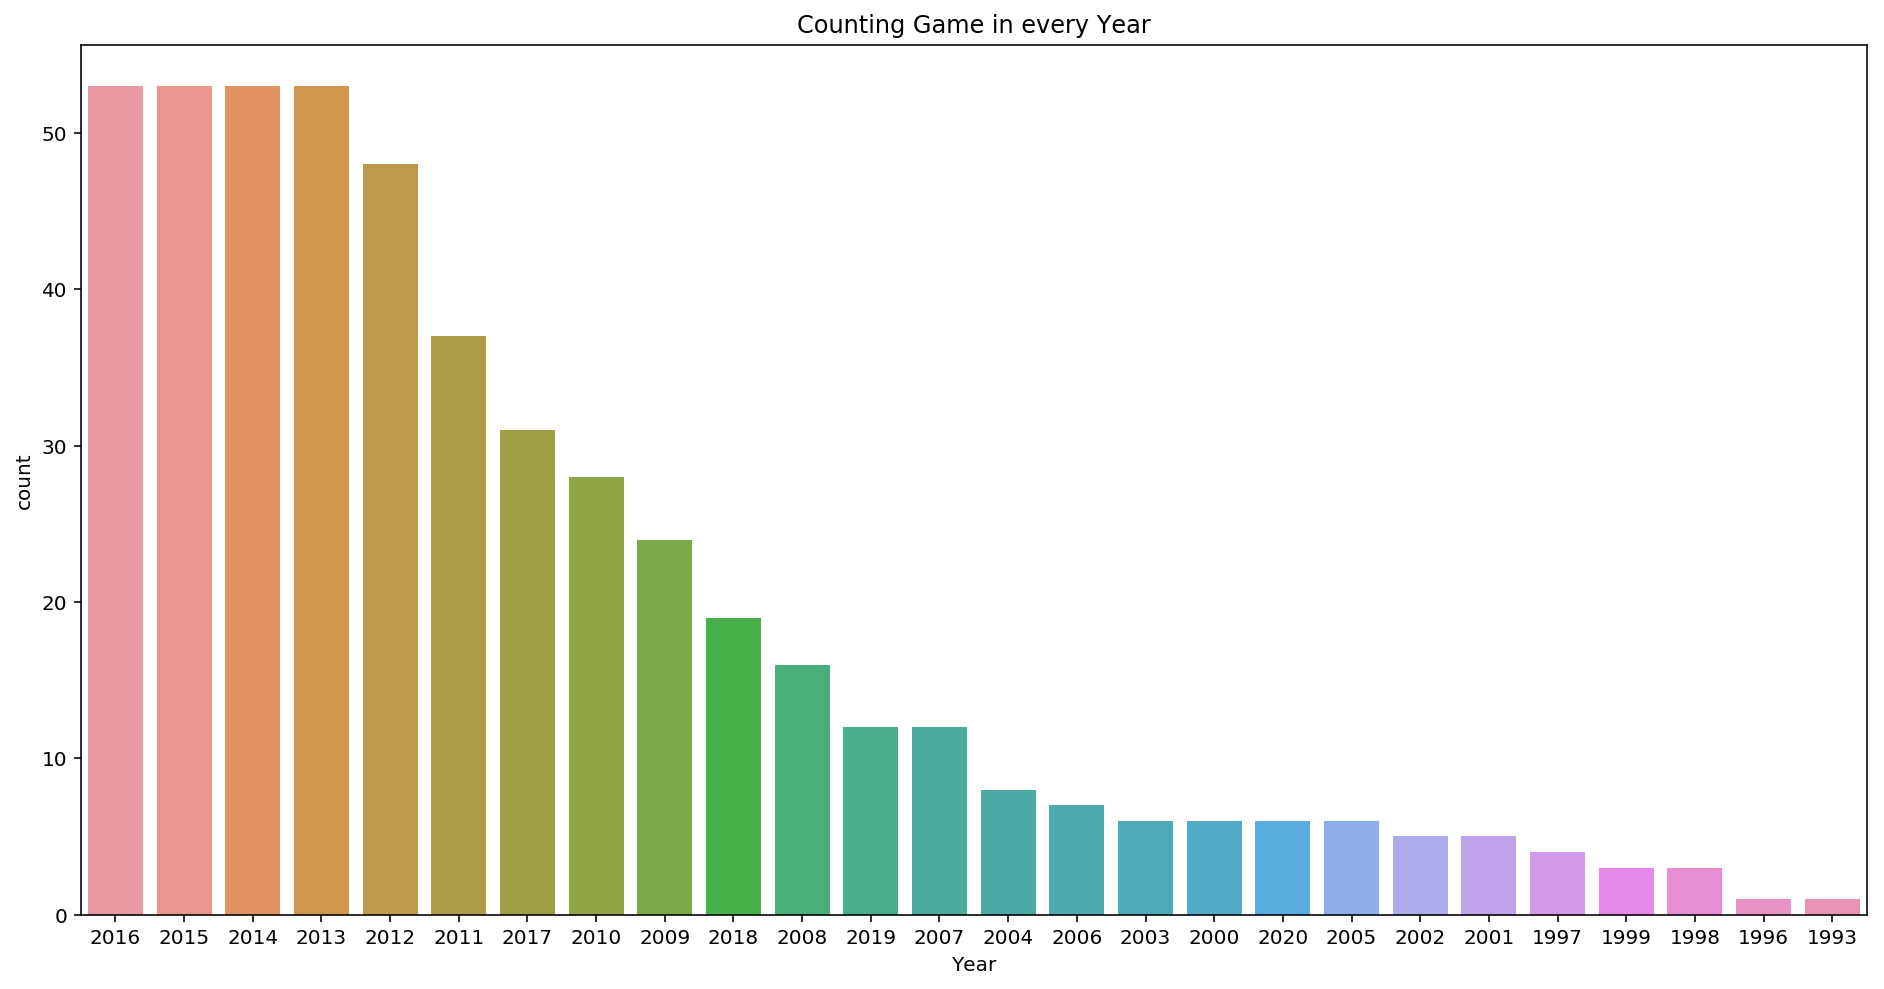

In [20]:
plt.figure(figsize=(16, 8)) #กำหนดขนาดของการพลอตกราฟ
sns.countplot(x='Year', data=cleandata, 
              order=cleandata['Year'].value_counts().index) #แกน x คือค่าปี แกน y จะนับจำนวนเกมในปีนั้นมาแสดงด้านซ้ายมือ ในรูปแบบช่วง
plt.title("Counting Game in every Year") #ตั้งชื่อกราฟที่แสดง

ประโยชที่ได้จากกราฟนี้คือ ทำให้ทราบว่าในแต่ละปีนั้นมีจำนวนเกมมากน้อยขนาดไหน จากข้อมูลทั้งหมดภายใน dataframe

## กราฟแสดงจำนวนเกมที่แนะนำ โดยใช้ Pie Chart

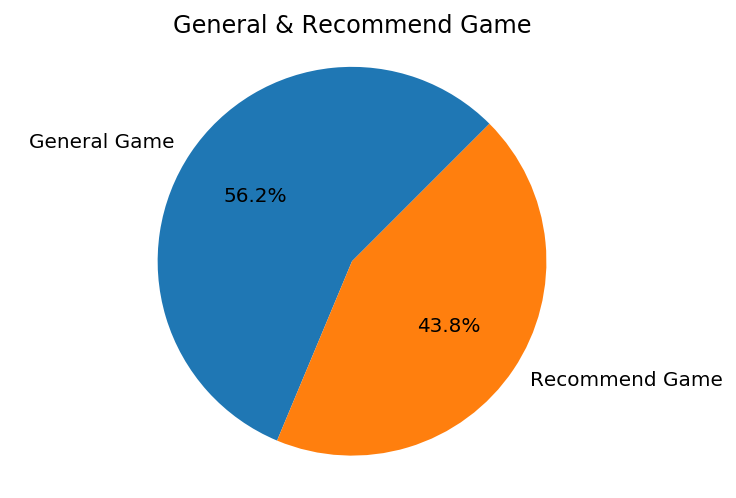

In [21]:
#สร้าง pie chart จาก matplotlib
labels = 'General Game', 'Recommend Game' #ตั้งค่าแถบชื่อที่แสดงใน pie chart
sizes = cleandata['Degree'].value_counts(normalize=True) #ปรับขนาดกราฟให้พอดี
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45) #แสดงค่าออกมาเป็นเปอร์เซนต์ที่มีทศนิยม 1 ตำแหน่ง เริ่มที่มุม 45 องศา
ax1.axis('equal')
plt.title("General & Recommend Game") #ตั้งชื่อกราฟ
plt.show() 

แสดงผลของจำนวนเกมที่เป็นเกมแนะนำและเป็นเกมธรรมดาในรูปแบบของเปอร์เซนต์ ในรูปแบบ Pie Chart

## กราฟแท่งแสดงเกมที่มีค่า Rating มากที่สุด 20 อันดับแรก

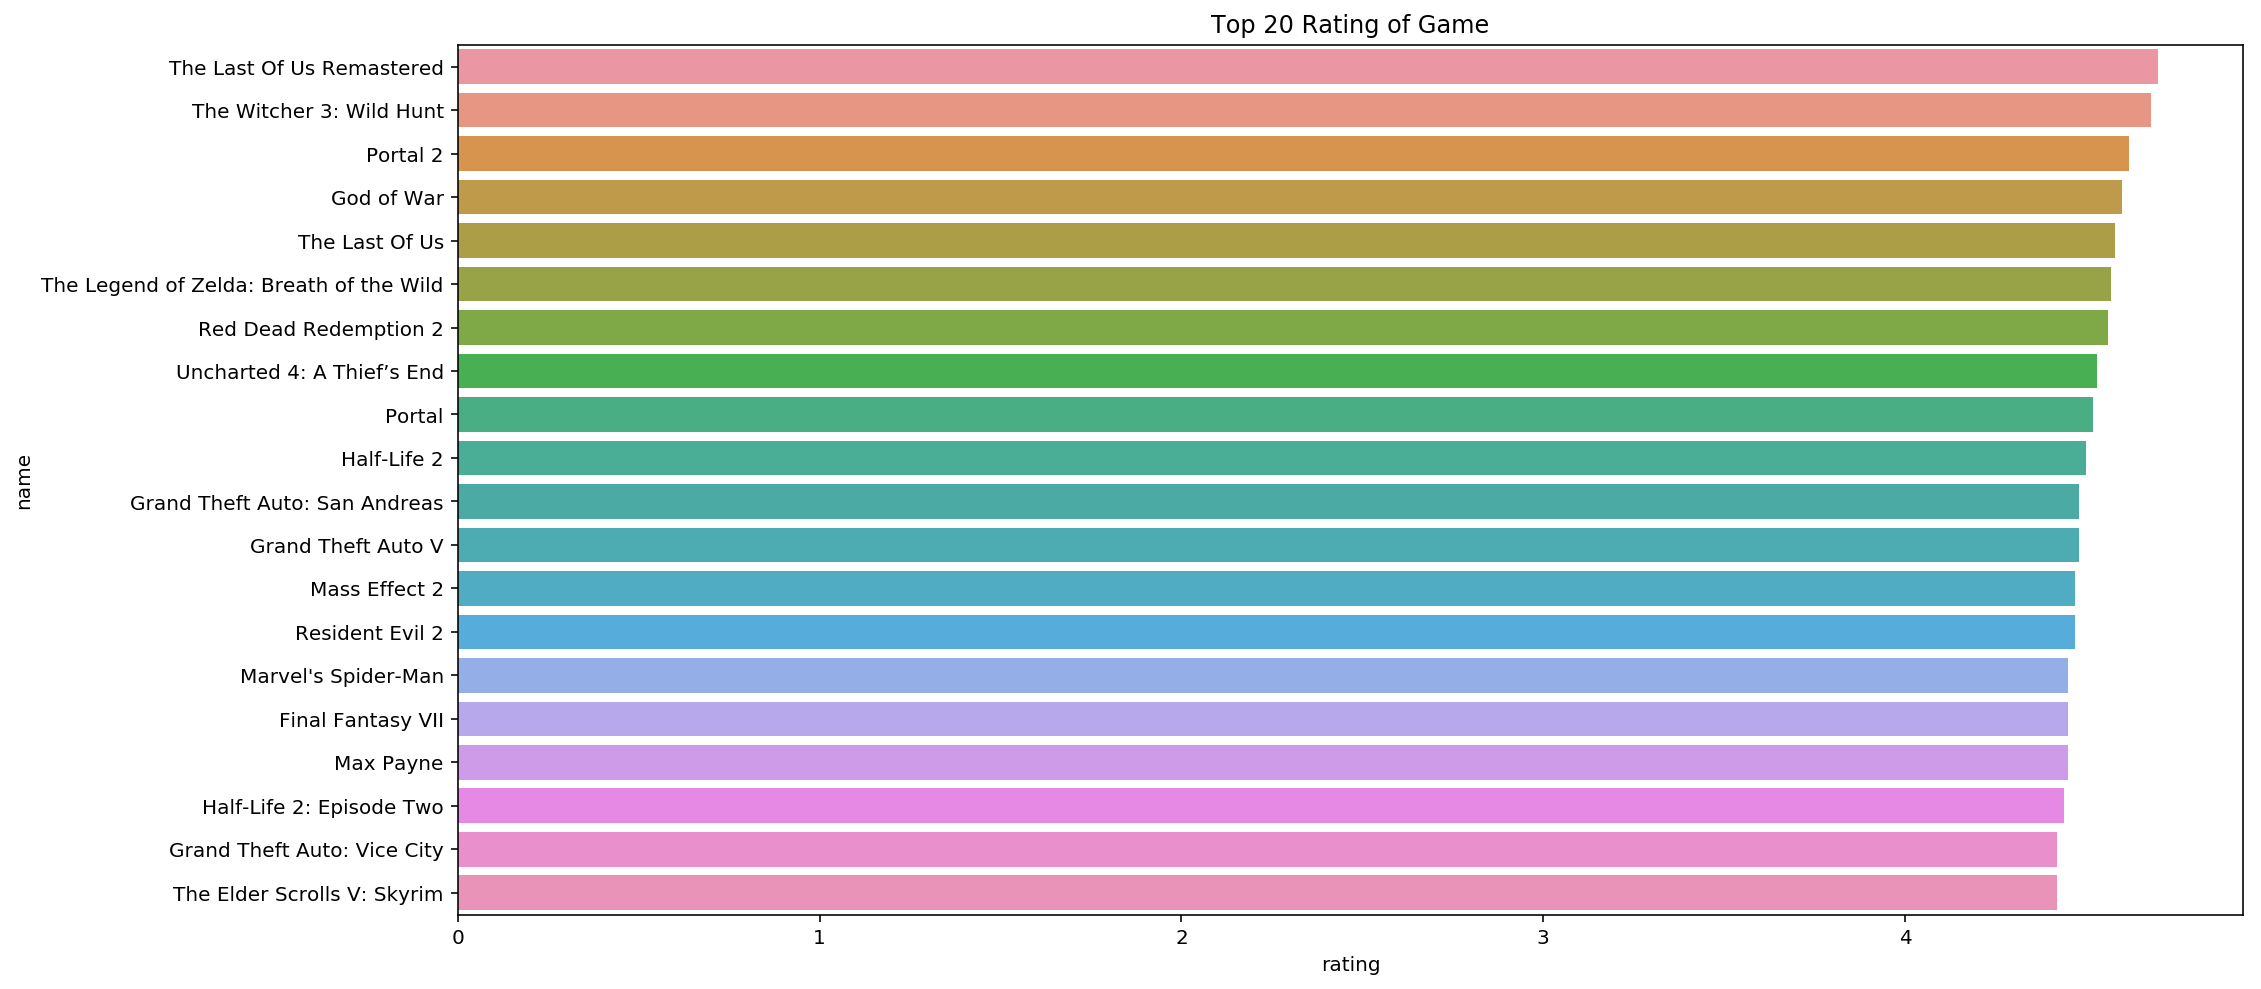

In [14]:
plt.figure(figsize=(16, 8)) #กำหนดขนาดความกว้างยาวของกราฟ
topgame = cleandata.sort_values(['rating'], ascending=False).head(20) #คัดเลือกข้อมูลที่ต้องการมาเก็บในตัวแปร โดยเรียงจาก rating มากที่สุด 20 เกม
plt.title("Top 20 Rating of Game") #ตั้งชื่อกราฟ
sns.barplot(data=topgame, x='rating', y='name') #ใช้ข้อมูลที่คัดมา ให้แกน x เป็น rating แกน y แสดงชื่อเกม

## Bar & Pie Chart ที่แสดง 10 อันดับเกมในปี 2014-2016

### ปี 2014

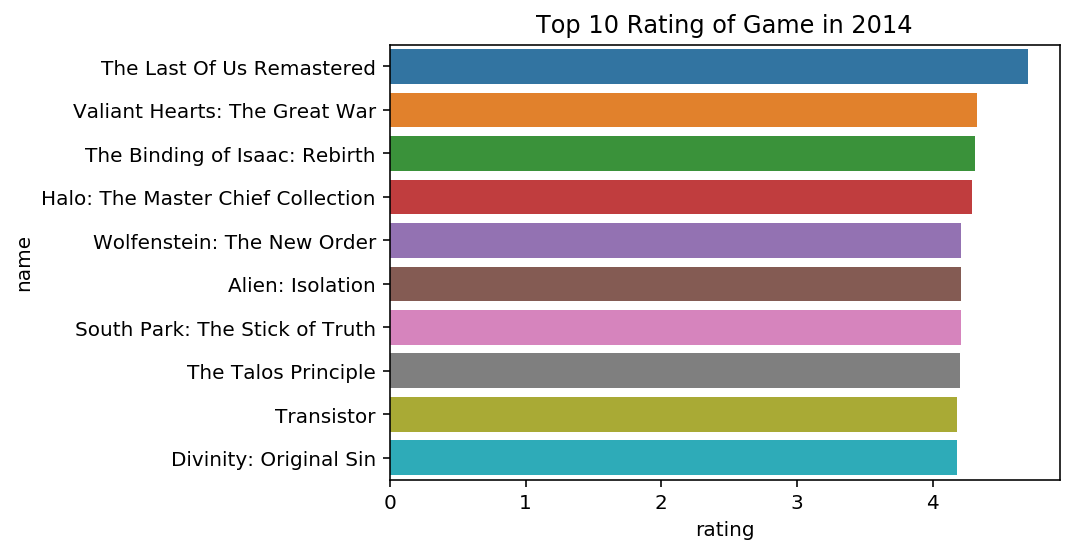

In [15]:
top2014 = cleandata.loc[cleandata['Year'] == 2014] #เลือกข้อมูลเฉพาะปี 2014
tt2014 = top2014.sort_values(['rating'], ascending=False).head(10) #จัดอันดับ 10 อันดับตาม rating
plt.title("Top 10 Rating of Game in 2014") #ตั้งชื่อกราฟ
sns.barplot(data=tt2014, x='rating', y='name') #ใช้ข้อมูลที่คัดมา ให้แกน x เป็น rating แกน y แสดงชื่อเกม

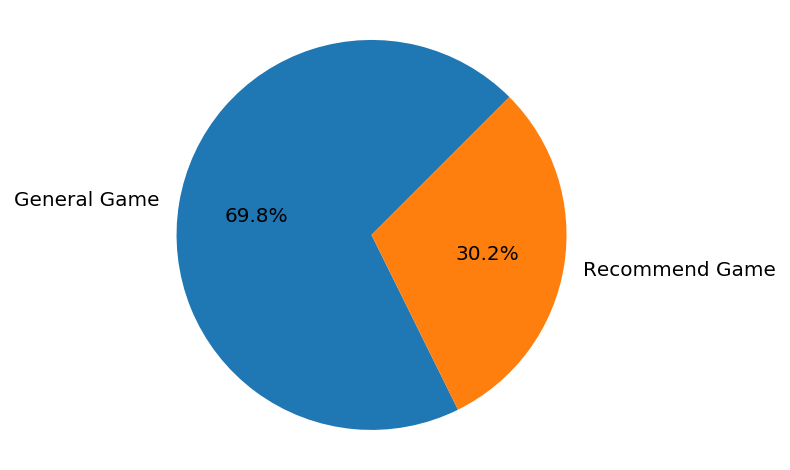

In [16]:
labels = 'General Game', 'Recommend Game'#ตั้งค่าแถบชื่อที่แสดงใน pie chart
sizes = top2014['Degree'].value_counts(normalize=True)#ปรับขนาดกราฟให้พอดี
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)#แสดงค่าออกมาเป็นเปอร์เซนต์ที่มีทศนิยม 1 ตำแหน่ง เริ่มที่มุม 45 องศา
ax1.axis('equal')
plt.show()

### ปี 2015

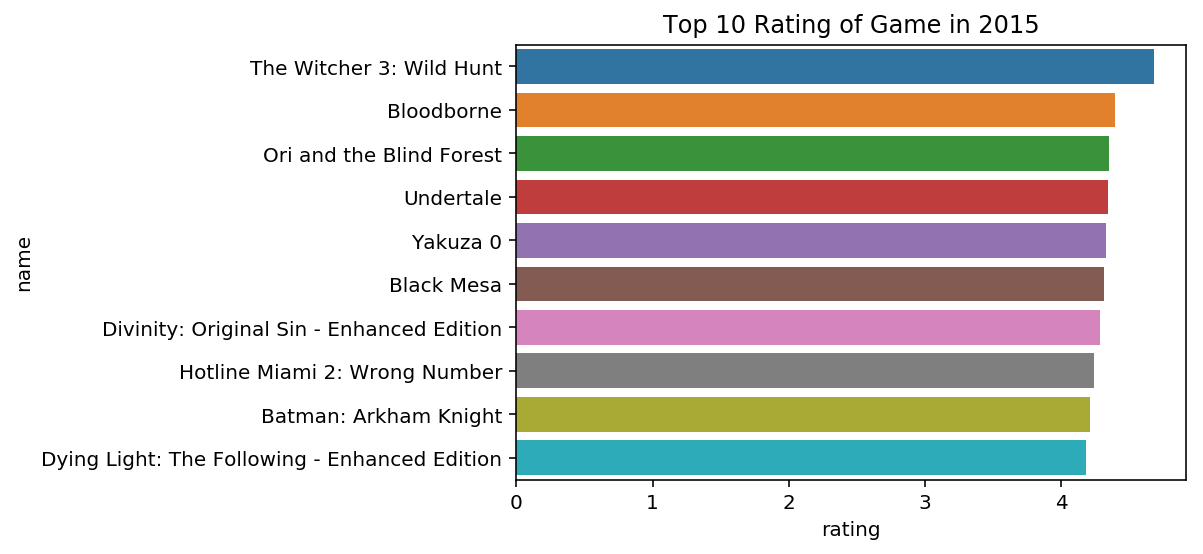

In [22]:
top2015 = cleandata.loc[cleandata['Year'] == 2015]
tt2015 = top2015.sort_values(['rating'], ascending=False).head(10)
plt.title("Top 10 Rating of Game in 2015")
sns.barplot(data=tt2015, x='rating', y='name')

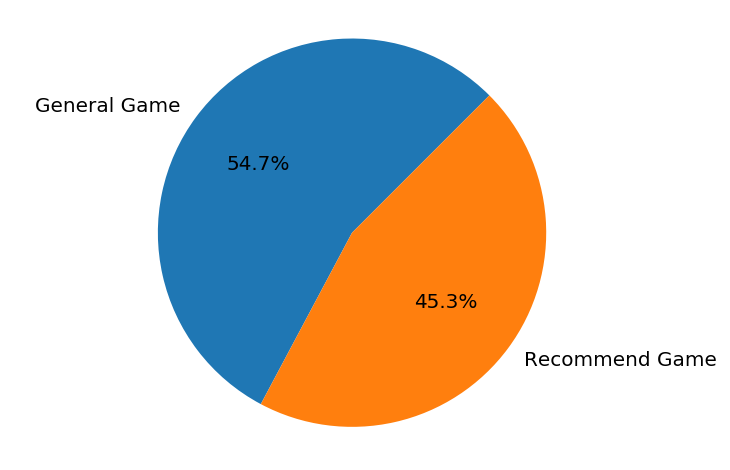

In [23]:
labels = 'General Game', 'Recommend Game'
sizes = top2015['Degree'].value_counts(normalize=True)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.axis('equal')
plt.show()

### ปี 2016

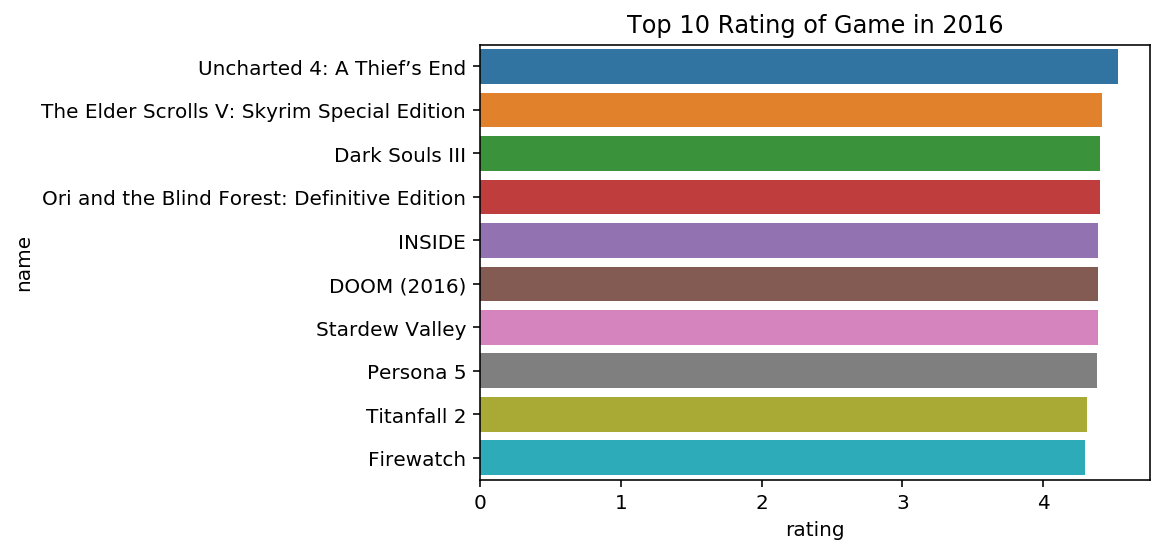

In [24]:
top2016 = cleandata.loc[cleandata['Year'] == 2016]
tt2016 = top2016.sort_values(['rating'], ascending=False).head(10)
plt.title("Top 10 Rating of Game in 2016")
sns.barplot(data=tt2016, x='rating', y='name')

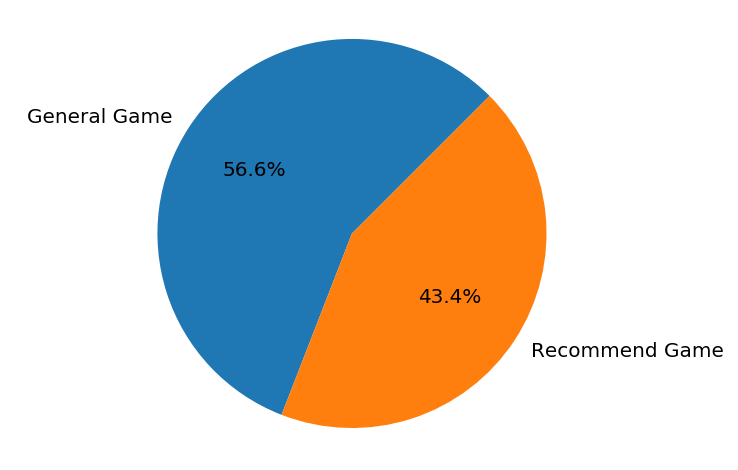

In [25]:
labels = 'General Game', 'Recommend Game'
sizes = top2016['Degree'].value_counts(normalize=True)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.axis('equal')
plt.show()

## Tentative Conclusion

   สรุปภาพรวมจากการทำ data visualization ทำให้สามารถดูค่า rating ของเกมในแต่ละปีที่มีข้อมูลอยู่ภายใน data frame และ ทราบจำนวนเกมที่เป็นเกมแนะนำ
สำหรับการตัดสินใจหาซื้อเกมนั้นๆ มาลองเล่นแล้วยังสามารถนำไปใช้ในการตัดสินใจในด้านการลงทุนพัฒนาเกมให้มีแนวเกมเป็นไปในทางที่คนส่วนมากให้ความสนใจ โดยอิงจาก
ค่า rating ของเกม และภาพรวมทางสถิติพบว่าจำนวนเกมที่มีมากที่สุดใน data frame คือ ปี 2016 และจำนวนน้อยที่สุดคือปี 1993 และมีเกมที่มี ค่า rating มากที่สุดคือ
เกม The Last Of US Remastered โดยมีค่า rating ที่ 4.7 คะแนน
***การดึงข้อมูลในแต่ละครั้งอาจทำให้ข้อมูลเปลี่ยนแปลงไปตาม api ต้นทางอาจทำให้คำอธิบายไม่ตรงกับข้อมูลที่แสดง***